# Objective
Swiggito, the online food delivery app, has reached out to you to help them to identify hidden insights from the order data and also identify the factors that are impacting the customer service measured as rating

The flow of the case study is as below:

    *Reading the data in python
    *Cleaning the data and transform to be useful for basic analysis
    *Identifying the Target variable and it's dsitribution
    *Basic Data exploration
    *Feature Engineering
    *Rejecting useless columns
    *Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
    *Feature Selection based on data distribution
    *Outlier treatment
    *Missing Values treatment
    *Visual correlation analysis
    *Statistical correlation analysis (Feature Selection)
    *Converting data to numeric for ML


## Reading the data into python
The first step in any machine learning program is to identify the data source and read into python. 
The data for this case study is provided as a .xlsx file.

The data has one file "Food Orders - Shared-1.xlsx". This file contains 60 order details.

In [3058]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3059]:
# Read data from xlsx file
SwiggitoData = pd.read_excel('Food Orders - Shared-1.xlsx')
print('Shape of the data before performing any action :', SwiggitoData.shape)
print('Columns')
SwiggitoData.columns

Shape of the data before performing any action : (60, 21)
Columns


Index(['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')

### Data description
Interpretting the column information based on the given data

<b>ID: </b> Unique identifier for each Order <br />
<b>Provider: </b> I assume that this is Food Provider or Restaurant, the data is Empty <br />
<b>DateTime: </b> Order Date and Time <br />
<b>Distance: </b> Order delivery distance <br />
<b>Status: </b> Order delivery status (Delivered or Cancelled) <br />
<b>Cost: </b> Order Cost <br />
<b>PromoCode: </b> Promo code used for the specific order <br />
<b>Delivery Time: </b> Exact time the Order is delivered <br />
<b>Discount: </b> Discount applied to the specific Order <br />
<b>Paid amount: </b> This Column is Empty, we can probably populate the total Cost is needed <br />
<b>Payment mode: </b> The mode of payment <br />
<b>Delivery charges: </b> Delivery charges applied to the specific order <br />
<b>Surge charges: </b> Surge charges if any for the specific order <br />
<b>Packaging charges: </b> Packaging order for the specific order <br />
<b>ST: </b> Service Tax for the specific order <br />
<b>Tip: </b> Tip added by the customer for the specific order <br />
<b>PureVeg: </b> Is the Ordered items pure Veg or not <br />
<b>Items: </b> Items list Semicolon sperated <br />
<b>Membership: </b> Doest he Customer have a membership <br />
<b>Type: </b> Items type Vex or Mix, This is a duplicate attribute at the first look to <b>PureVeg</b> <br />
<b>Rating: </b> Rating given to the order <br />


### Duplicate rows identification and handling

The first step after receiving the data is to identify duplicate rows and eliminate them as they add no value to data.

In [3060]:
print('Shape before deleting duplicate values:', SwiggitoData.shape)
# Removing duplicate rows if any
SwiggitoData=SwiggitoData.drop_duplicates()
print('Shape After deleting duplicate values:', SwiggitoData.shape)

Shape before deleting duplicate values: (60, 21)
Shape After deleting duplicate values: (58, 21)


There are 2 duplicate rows, which are elimated in the above step and right now the data size is 58 rows and 21 attributes.

In [3061]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
SwiggitoData.head(10)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
6,6.0,NaN,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
7,7.0,NaN,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
8,8.0,NaN,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
9,9.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0


## Defining the problem statement:
Clean the data for Exploratory data analysis to find hidden insights and Create a Predictive model which can predict the future Ratings. <br />
<b>Target Variable: </b>Rating <br />
<b>Predictors: </b>Have to find the predictors from the bunch of attributes after basic analysis and performing some statistical methods for feature subset selection


#### Looking at the distribution of Target variable

<AxesSubplot:>

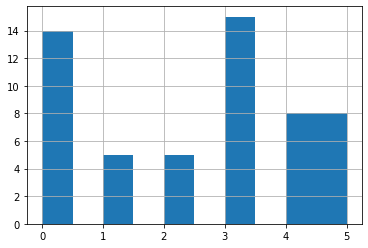

In [3062]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
SwiggitoData['Rating'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the rating of the Restaurant? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

    There are four commands which are used for Basic data exploration in Python

    *head() : This helps to see a few sample rows of the data
    *info() : This provides the summarized information of the data
    *describe() : This provides the descriptive statistical details of the data
    *nunique(): This helps us to identify if a column is categorical or continuous

In [3063]:
# Looking at sample rows in the data
SwiggitoData.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [3064]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values
# Remove Qualitative variables which cannot be used in Machine Learning
SwiggitoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 56 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           58 non-null     object 
 3   Distance           57 non-null     float64
 4   Status             57 non-null     object 
 5   Cost               58 non-null     object 
 6   PromoCode          35 non-null     object 
 7   Delivery Time      57 non-null     object 
 8   Discount           23 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       57 non-null     object 
 11  Delivery charges   58 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  58 non-null     object 
 14  ST                 58 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            57 non-nu

### Observations

    1.Provider is completely empty and can be removed
    2.Paid Amount is supposed to be completely empty, but we see one value with non empty. let's take a look at that row.
Looking at some of the Numeric columns like Cost which are supposed generate Mean and other info, looks like there are some non numerics which are causing this distortion.

At a First look at the Data Row 25 is Bad as the data is distorted and all the columns are shifted. I would like to eliminate this one row so that I have better data

In [3065]:
# Droping Provider attribute as it is of no use and completely empty
SwiggitoData = SwiggitoData.drop(columns=['Provider'])

In [3066]:
SwiggitoData.loc[SwiggitoData['Paid amount'].notnull()]

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
23,NaN,3-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10.0,5.0,NaN,Y,DAL;ROTI,NO,VEG,2.0,NaN,NaN,NaN,NaN,NaN


#### Remove Distorted row 23
Looking at this data clearly says that there is some data distrotion at this row 23, which is good to remove

In [3067]:
SwiggitoData.drop(SwiggitoData.loc[SwiggitoData['Paid amount'].notnull()].index, inplace=True)
SwiggitoData.shape

(57, 20)

In [3068]:
# Check info once again
SwiggitoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 56 non-null     float64
 1   DateTime           57 non-null     object 
 2   Distance           57 non-null     float64
 3   Status             57 non-null     object 
 4   Cost               57 non-null     object 
 5   PromoCode          34 non-null     object 
 6   Delivery Time      57 non-null     object 
 7   Discount           22 non-null     float64
 8   Paid amount        0 non-null      float64
 9   Payment mode       57 non-null     object 
 10  Delivery charges   57 non-null     object 
 11  Surge charges      27 non-null     object 
 12  Packaging charges  57 non-null     object 
 13  ST                 57 non-null     object 
 14  Tip                23 non-null     float64
 15  PureVeg            57 non-null     object 
 16  Items              57 non-nu

In [3069]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
SwiggitoData.nunique()

ID                   56
DateTime             35
Distance              4
Status                2
Cost                 19
PromoCode             2
Delivery Time        37
Discount              3
Paid amount           0
Payment mode          3
Delivery charges      2
Surge charges         2
Packaging charges     1
ST                    1
Tip                   1
PureVeg               2
Items                 5
Membership            3
Type                  2
Rating                6
dtype: int64

### Basic Data Exploration Results
Based on the basic exploration above, noting down the observations regaring each column.
The selected columns in this step are not final, further study will be done and then a final list will be created



| Feature | Type | Use in Model | Comments |
| :- | -: | :-: | :-: |
| ID | Qualitative | No | ID doesn't signify any impact |
| Provider | Qualitative | No | No Data Given and not of any use |
| DateTime | Quantitative | Yes | Ordered time is an important factor |
| Distance | Quantitative | Yes | Distance is important factor |
| Status | Qualitative | Yes | Delivery Status is important |
| Cost | Continuous | Yes | Cost may be a factor for rating |
| PromoCode | Qualitative | Yes | Promotion on Order may be a factor for rating |
| Delivery Time | Quantitative | Yes | Very imp to find the time taken for delivery |
| Discount | Continuous | Yes | Can impact the rating |
| Paid amount | Continuous | No | I will drop this as individual Costs will be benificial for model |
| Payment mode | Qualitative | Yes | Can impact the rating |
| Delivery charges | Continuous | Yes | Can Impact the rating |
| Surge charges | Continuous | Yes | Can Impact the rating |
| Packaging charges | Continuous | No | All values are same |
| ST | Continuous | No | Same for all Orders |
| Tip | Continuous | Yes | Can impact the rating |
| PureVeg | Qualitative | Yes | Can impact the rating |
| Items | Qualitative | Yes | Helpful for rating |
| Membership | Qualitative | Yes | Can impact Rating |
| Type | Qualitative | No | Duplicate of Pure Veg attribute |
| Rating | Continuous | Yes | TARGET variable |



## Important Observations and decisions on few attributes - dropped 
### ID
ID has no significance apart from a series running for uniqueness in the database and hence dropping

### Paid amount
Paid Amount is empty, this can be populated using Sum of all charges minus the discount, however we would like to explore individual amounts as the weightage can be given differtly for Item cost Vs Delivery charges Vs Surge price etc. If I combine them all , then each factor may not have right factor in desciding the target variable.
Example : a Surge price of 40 Vs 40 rs more in item cost, will add up to the same total.

### Packaging Charges & ST
As the Packaging charges and ST are same for all orders in the sample given, it will have no impact on the ratings as there is no distribution, hence dropping them

### Type
Type is a duplicate of PureVeg column and hence dropping

Now that we have cleared some unnecessory columns, it's a good practice to rename the columns for better labelling

In [3070]:
SwiggitoData = SwiggitoData.drop(columns=['ID', 'Paid amount' ,'Packaging charges', 'ST', 'Type'])

In [3071]:
SwiggitoData.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Rating'],
      dtype='object')

### Attribute Labeling

In [3072]:
#Attribute Labelling
SwiggitoData.rename(columns={'DateTime': 'OrderTime','Delivery Time': 'DeliveryTime', 'Paid amount': 'PaidAmount', 'Payment mode': 'PaymentMode', 'Delivery charges': 'DeliveryCharges', 'Surge charges': 'SurgeCharges' }, inplace=True)

We will further take a deep look at each column to identify more opportunities for data cleaning

In [3073]:
SwiggitoData.describe(include='all')

,OrderTime,Distance,Status,Cost,PromoCode,DeliveryTime,Discount,PaymentMode,DeliveryCharges,SurgeCharges,Tip,PureVeg,Items,Membership,Rating
count,57,57.000000,57,57.0,34,57,22.000000,57,57.0,27.0,23.0,57,57,57,55.000000
unique,35,NaN,2,19.0,2,37,NaN,3,2.0,2.0,NaN,2,5,3,NaN
top,5-July-2020 7.38 PM,NaN,Delivered,300.0,PRO,5-July-2020 8.38 PM,NaN,COD,20.0,10.0,NaN,Y,DAL;CHICKEN;ROTI,BING,NaN
freq,3,NaN,35,8.0,27,4,NaN,25,37.0,16.0,NaN,34,13,27,NaN
mean,NaN,3.614035,NaN,NaN,NaN,NaN,34.090909,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2.400000
std,NaN,1.359548,NaN,NaN,NaN,NaN,18.168285,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.780553
min,NaN,-2.000000,NaN,NaN,NaN,NaN,-25.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.000000
25%,NaN,3.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.500000
50%,NaN,3.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.000000
75%,NaN,4.000000,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.000000


The above describe shows that there are some non numerics in the numerical data and hance we will do a unique value analysis to find the bad data and take necessory actions

### Unique value analysis

In [3074]:
# Function to display unique values from each columns
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")  

In [3075]:
# Display unique values for each column to handle missing values, outliers etc.
show_unique_values(SwiggitoData)

Unique value for dataset attributes :

OrderTime   ['1-July-2020 8.38 PM' '1-July-2020 8.38 AM' '1-July-2020 9.00 PM'
 '1-July-2020 7.30 PM' '1-July-2020 7.38 PM' '1-July-2020 9.38 AM'
 '1-July-2020 8.00 PM' '2-July-2020 8.38 PM' '2-July-2020 8.38 AM'
 '2-July-2020 9.00 PM' '2-July-2020 7.30 PM' '2-July-2020 7.38 PM'
 '2-July-2020 9.38 AM' '2-July-2020 8.00 PM' '3-July-2020 8.38 PM'
 '3-July-2020 8.38 AM' '3-July-2020 9.00 PM' '3-July-2020 7.30 PM'
 '3-July-2020 7.38 PM' '3-July-2020 9.38 AM' '3-July-2020 8.00 PM'
 '4-July-2020 8.38 PM' '4-July-2020 8.38 AM' '4-July-2020 9.00 PM'
 '4-July-2020 7.30 PM' '4-July-2020 7.38 PM' '4-July-2020 9.38 AM'
 '4-July-2020 8.00 PM' '5-July-2020 8.38 PM' '5-July-2020 8.38 AM'
 '5-July-2020 9.00 PM' '5-July-2020 7.30 PM' '5-July-2020 7.38 PM'
 '5-July-2020 9.38 AM' '5-July-2020 8.00 PM'] 

Distance   [ 3.  6.  4. -2.] 

Status   ['Delivered' 'Cancelled'] 

Cost   [300 100 250 550 125 280 120 230 450 150 500 400 200 350 600 225 380 220
 330] 

PromoCod

At a first look we see there are few nans in the data and hence running a isnull().sum() to know how many

In [3076]:
SwiggitoData.isnull().sum()

OrderTime           0
Distance            0
Status              0
Cost                0
PromoCode          23
DeliveryTime        0
Discount           35
PaymentMode         0
DeliveryCharges     0
SurgeCharges       30
Tip                34
PureVeg             0
Items               0
Membership          0
Rating              2
dtype: int64

### Observation and data cleaning
    1.Distance has got a negative value and nan, applying an absolutye function and replacing missing values with mean
    2.Discount has got nan, filling them with 0 as the disocunt given is 0 for missing value and there is a negative value, applying absolute
    3.SurgeCharges has nan and filling it with 0- makes sense as the cost is 0- for missing values
    4. Tip has got nans, filling with 0 as the Tip given is 0 for missing values
    5. There are nans in the output data which will be replaced with mean. 
<b>The ideal way to deal with missing Target variable data is to delete, however as the data set is smaller we am not deleting them and replacing them with mean</b>

In [3077]:
SwiggitoData['Distance']= SwiggitoData['Distance'].abs()
SwiggitoData['Distance'] = SwiggitoData['Distance'].fillna(SwiggitoData['Distance'].mean())

In [3078]:
SwiggitoData['Discount'] = SwiggitoData['Discount'].fillna(0)
SwiggitoData['Discount']= SwiggitoData['Discount'].abs()

In [3079]:
SwiggitoData['SurgeCharges'] = SwiggitoData['SurgeCharges'].fillna(0)

In [3080]:
SwiggitoData['Tip'] = SwiggitoData['Tip'].fillna(0)

In [3081]:
SwiggitoData['Rating'] = SwiggitoData['Rating'].fillna(SwiggitoData['Rating'].mean())

In [3082]:
SwiggitoData.isnull().sum()

OrderTime           0
Distance            0
Status              0
Cost                0
PromoCode          23
DeliveryTime        0
Discount            0
PaymentMode         0
DeliveryCharges     0
SurgeCharges        0
Tip                 0
PureVeg             0
Items               0
Membership          0
Rating              0
dtype: int64

### Datatype conversion
Let's consider Numerics which are not int or float types

In [3083]:
SwiggitoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderTime        57 non-null     object 
 1   Distance         57 non-null     float64
 2   Status           57 non-null     object 
 3   Cost             57 non-null     object 
 4   PromoCode        34 non-null     object 
 5   DeliveryTime     57 non-null     object 
 6   Discount         57 non-null     float64
 7   PaymentMode      57 non-null     object 
 8   DeliveryCharges  57 non-null     object 
 9   SurgeCharges     57 non-null     int64  
 10  Tip              57 non-null     float64
 11  PureVeg          57 non-null     object 
 12  Items            57 non-null     object 
 13  Membership       57 non-null     object 
 14  Rating           57 non-null     float64
dtypes: float64(4), int64(1), object(10)
memory usage: 7.1+ KB


In [3084]:
SwiggitoData[["Cost"]] = SwiggitoData[["Cost"]].astype("float")
SwiggitoData[["DeliveryCharges"]] = SwiggitoData[["DeliveryCharges"]].astype("float")

Now the data looks much cleaner for analysis. We will do further analysis

In [3085]:
SwiggitoData.describe()

,Distance,Cost,Discount,DeliveryCharges,SurgeCharges,Tip,Rating
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,3.684211,291.403509,14.035088,21.754386,6.666667,2.017544,2.400000
std,1.151984,138.795052,19.489892,2.407434,7.867958,2.474810,1.748469
min,2.000000,100.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,3.000000,200.000000,0.000000,20.000000,0.000000,0.000000,1.000000
50%,3.000000,280.000000,0.000000,20.000000,0.000000,0.000000,3.000000
75%,4.000000,400.000000,25.000000,25.000000,10.000000,5.000000,4.000000
max,6.000000,600.000000,50.000000,25.000000,20.000000,5.000000,5.000000


In [3086]:
SwiggitoData.describe(include='all')

,OrderTime,Distance,Status,Cost,PromoCode,DeliveryTime,Discount,PaymentMode,DeliveryCharges,SurgeCharges,Tip,PureVeg,Items,Membership,Rating
count,57,57.000000,57,57.000000,34,57,57.000000,57,57.000000,57.000000,57.000000,57,57,57,57.000000
unique,35,NaN,2,NaN,2,37,NaN,3,NaN,NaN,NaN,2,5,3,NaN
top,5-July-2020 7.38 PM,NaN,Delivered,NaN,PRO,5-July-2020 8.38 PM,NaN,COD,NaN,NaN,NaN,Y,DAL;CHICKEN;ROTI,BING,NaN
freq,3,NaN,35,NaN,27,4,NaN,25,NaN,NaN,NaN,34,13,27,NaN
mean,NaN,3.684211,NaN,291.403509,NaN,NaN,14.035088,NaN,21.754386,6.666667,2.017544,NaN,NaN,NaN,2.400000
std,NaN,1.151984,NaN,138.795052,NaN,NaN,19.489892,NaN,2.407434,7.867958,2.474810,NaN,NaN,NaN,1.748469
min,NaN,2.000000,NaN,100.000000,NaN,NaN,0.000000,NaN,20.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,3.000000,NaN,200.000000,NaN,NaN,0.000000,NaN,20.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
50%,NaN,3.000000,NaN,280.000000,NaN,NaN,0.000000,NaN,20.000000,0.000000,0.000000,NaN,NaN,NaN,3.000000
75%,NaN,4.000000,NaN,400.000000,NaN,NaN,25.000000,NaN,25.000000,10.000000,5.000000,NaN,NaN,NaN,4.000000


### New Features & Data Discretization / Binning

In this section we will find opportunities to derive and add features as well as perform operations like Binning for existing attributes to better use the data for analysis and Model generation

    1.At the first look we can derive the Time taken for delivery by substracting Delivery Time from Order Time
    2.We can also find the number of items ordered from the Items column by splitting with Semi Colon

In [3087]:
#Convert datetime columns to internal datetime64 format so we can perform date functions on them
SwiggitoData['OrderTime'] = pd.to_datetime(SwiggitoData['OrderTime'], format='%d-%B-%Y %I.%M %p')
SwiggitoData['DeliveryTime'] = pd.to_datetime(SwiggitoData['DeliveryTime'], format='%d-%B-%Y %I.%M %p')
SwiggitoData['TimeToDeliver']  = ((SwiggitoData['DeliveryTime'] - SwiggitoData['OrderTime']).dt.seconds)/60 

In [3088]:
# Items Count Function
def Item_counter(items):
    return len(str(items).split(';'))

In [3089]:
# Creating a new feature as Items Count for using in the ML model
SwiggitoData['ItemsCount'] = SwiggitoData['Items'].apply(Item_counter)
SwiggitoData.head()

,OrderTime,Distance,Status,Cost,PromoCode,DeliveryTime,Discount,PaymentMode,DeliveryCharges,SurgeCharges,Tip,PureVeg,Items,Membership,Rating,TimeToDeliver,ItemsCount
0,2020-07-01 20:38:00,3.0,Delivered,300.0,PRO,2020-07-01 21:38:00,50.0,COD,20.0,0,0.0,Y,PANEER;ROTI,BING,2.0,60.0,2
1,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,WALLET,20.0,0,5.0,N,DAL;CHICKEN;ROTI,BONG,4.0,20.0,3
2,2020-07-01 21:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 21:30:00,25.0,CARD,25.0,10,5.0,Y,MIXVEG;RICE,BING,0.0,30.0,2
3,2020-07-01 19:30:00,4.0,Delivered,550.0,PRO,2020-07-01 21:05:00,0.0,COD,25.0,10,0.0,N,CHICKEN;BIRYANI,NO,1.0,95.0,2
4,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 19:38:00,0.0,COD,20.0,0,0.0,Y,DAL;ROTI,NO,1.0,1380.0,2


### Conclusion of data cleansing activity
Now we see that the data is more cleaner and have right attributes needed for analysis

## Descriptive Analysis

<AxesSubplot:ylabel='Items'>

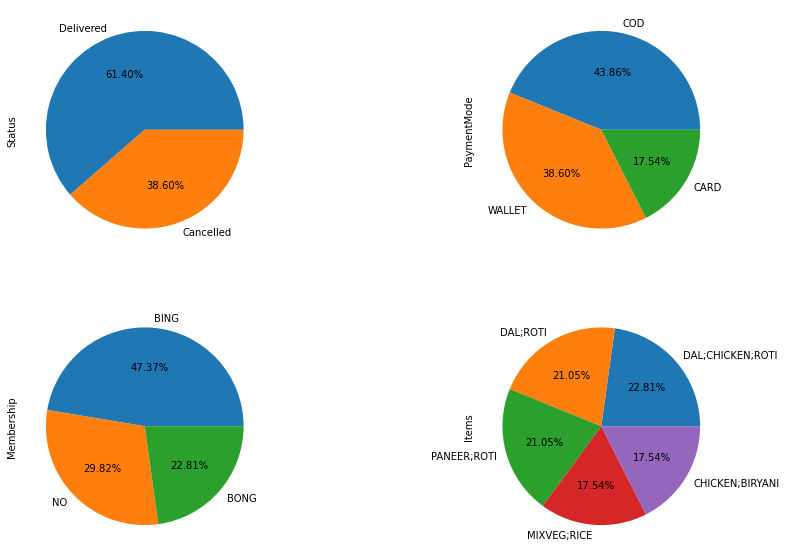

In [3090]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
SwiggitoData.Status.value_counts().plot(kind='pie', ax=ax[0,0], autopct='%1.2f%%')
SwiggitoData.PaymentMode.value_counts().plot(kind='pie', ax=ax[0,1], autopct='%1.2f%%')
SwiggitoData.Membership.value_counts().plot(kind='pie', ax=ax[1,0], autopct='%1.2f%%')
SwiggitoData.Items.value_counts().plot(kind='pie', ax=ax[1,1], autopct='%1.2f%%')

### Insights: 
    *About 60% of the orders are delivered sucessfully and 40% of the orders are cancelled. 
    *Cash on delivery is the most prefered mode of payment 
    *Mixed Veg Rice and Chicken Biryani are ordered by 15% of customers 
    *Roti with paneer or dal are ordered by 25% of customers *Dal, Chicken and Roti are ordered by 30% of the customers. 
    *BING is the most used membership type.

<AxesSubplot:ylabel='Status'>

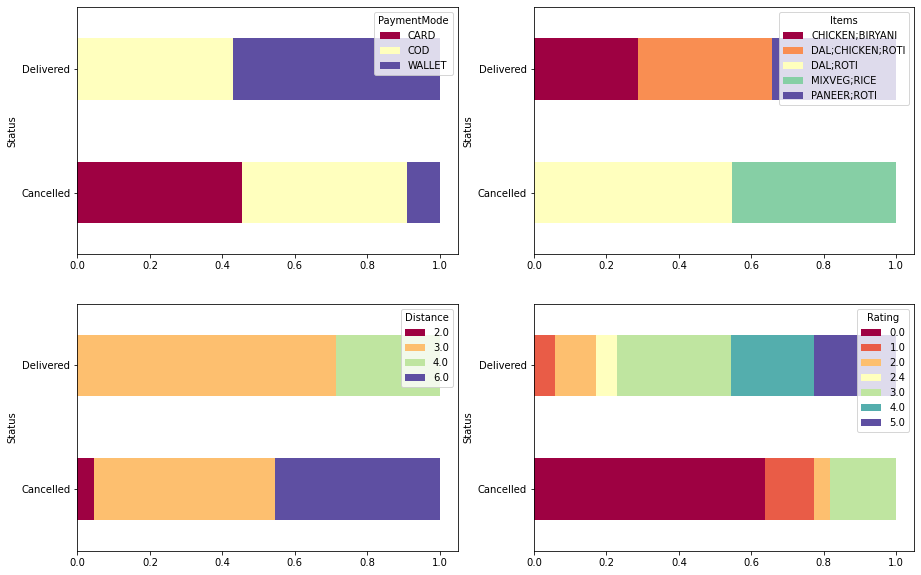

In [3091]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

fig,ax = plt.subplots(2,2,figsize=(15,10))
Status=pd.crosstab(SwiggitoData['Status'],SwiggitoData['PaymentMode'])
Status.div(Status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap1, stacked=True, ax=ax[0,0])
Status=pd.crosstab(SwiggitoData['Status'],SwiggitoData['Items'])
Status.div(Status.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, cmap=cmap1, ax=ax[0,1])
Status=pd.crosstab(SwiggitoData['Status'],SwiggitoData['Distance'])
Status.div(Status.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True,cmap=cmap1, ax=ax[1,0])
Status=pd.crosstab(SwiggitoData['Status'],SwiggitoData['Rating'])
Status.div(Status.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True,cmap=cmap1, ax=ax[1,1])

### Insights: 
    *Most of the wallet payers doesn't cancel the order
    *Most of the Card payers have cancelled the orders
    *Mix veg rice and Roti with dal are always cancelled
    *All the orders at 2 and 6kms distance is cancelled
    *All the 4kms distance orders are delivered
    *Most of the Cancelled items are rated as 0,1,2
    *There are bad rating even in the Delivered items
    *3 and above is more then 70% in ratings of delivered items

### Cleaning useless columns

In [3092]:
#Now that we have Items count, Items column is not useful, dropping off
SwiggitoData.drop(columns=['Items'], inplace=True)
# Also dripping the OrderTime and DeliveryTime as there is no significance
SwiggitoData = SwiggitoData.drop(['OrderTime', 'DeliveryTime'],axis=1)
SwiggitoData.head()

,Distance,Status,Cost,PromoCode,Discount,PaymentMode,DeliveryCharges,SurgeCharges,Tip,PureVeg,Membership,Rating,TimeToDeliver,ItemsCount
0,3.0,Delivered,300.0,PRO,50.0,COD,20.0,0,0.0,Y,BING,2.0,60.0,2
1,3.0,Delivered,100.0,BF,0.0,WALLET,20.0,0,5.0,N,BONG,4.0,20.0,3
2,6.0,Cancelled,250.0,PRO,25.0,CARD,25.0,10,5.0,Y,BING,0.0,30.0,2
3,4.0,Delivered,550.0,PRO,0.0,COD,25.0,10,0.0,N,NO,1.0,95.0,2
4,3.0,Cancelled,125.0,PRO,0.0,COD,20.0,0,0.0,Y,NO,1.0,1380.0,2


### Visual Exploratory Data Analysis
We have Categorical attributes like Status, PromoCode, PaymentMode etc., as well as Continuous data like Cost, Distance, Discount etc.,
For Visual analysis we will be using

    *Bar plot for Categorical variables
    *Histogram for Continuous variables
    
Categorical : 'Status','PromoCode', 'PaymentMode', 'PureVeg', 'Membership' <br/>
Continuous : 'Distance', 'Cost','Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip', 'Rating','TimeToDeliver', 'ItemsCount'

In [3093]:
# Function to display Bar chart in one line for better visibility of data
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

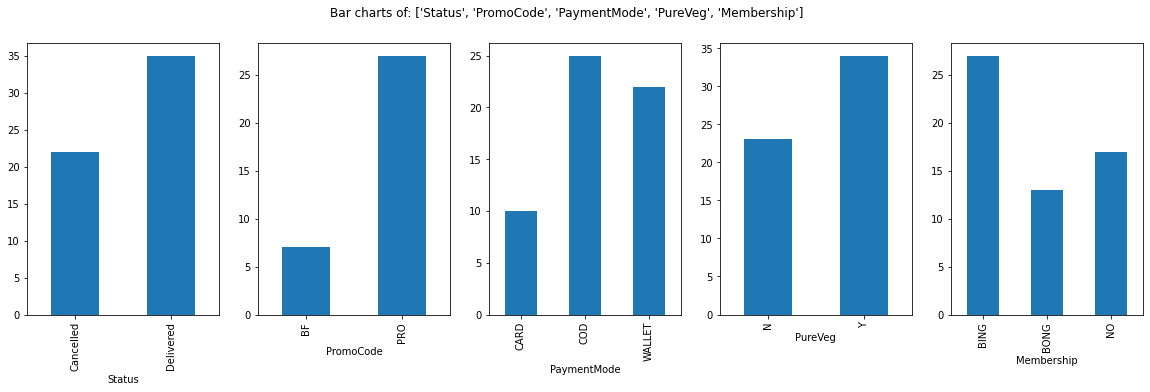

In [3094]:
PlotBarCharts(inpData=SwiggitoData, colsToPlot=[
    'Status','PromoCode', 'PaymentMode', 'PureVeg', 'Membership'])

### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

We observe the frequency of each category is comparable and hance from the Visual analysis we are selecting all attibutes for ML model.


### Visualize distribution of all the Continuous Predictor variables in the data using histograms¶

Based on the Basic Data Exploration : Distance, Cost, Discount, DeliveryCharges, 
    SurgeCharges, Tip, Rating, TimeToDeliver, ItemsCount are continuous predictors.

array([[<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'DeliveryCharges'}>,
        <AxesSubplot:title={'center':'SurgeCharges'}>,
        <AxesSubplot:title={'center':'Tip'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'TimeToDeliver'}>,
        <AxesSubplot:title={'center':'ItemsCount'}>]], dtype=object)

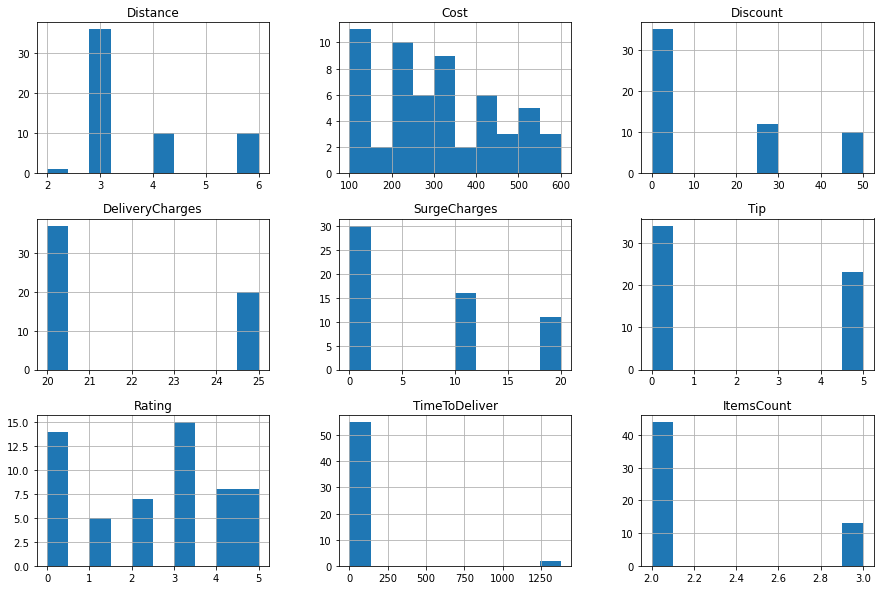

In [3095]:
SwiggitoData.hist(['Distance', 'Cost', 'Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip', 'Rating',
                  'TimeToDeliver', 'ItemsCount'], figsize=(15,10))

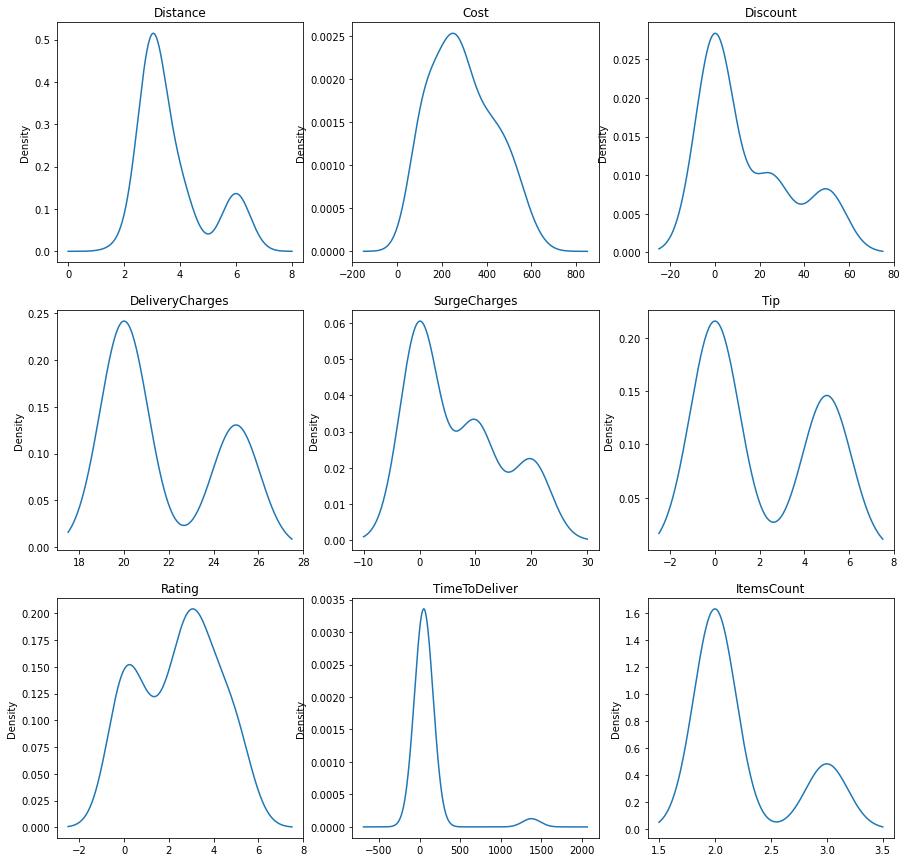

In [3096]:
cols = ['Distance', 'Cost', 'Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip', 'Rating',
                  'TimeToDeliver', 'ItemsCount']
fig,ax = plt.subplots(3,3,figsize=(15,15))
row = col = 0
for n,c in enumerate(cols):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    SwiggitoData[c].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1

### Histogram & Densityplots Interpretation

Histograms shows us the data distribution for a single continuous variable. Density plot shows it more clearly.
The X-axis shows the range of values and Y-axis represent the number of values in that range

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. 
If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

Distance - Selected <br />
Discount - Selected <br />
SurgeCharge - Slected <br />
Tip - Selected <br />
Rating - Output Variable <br />
TimeToDeliver - Selected - <b> Needs Outlier treatment </b><br />
ItemsCount - Selected <br />

To Check the Outliers .. Also plotting BoxPlot


### Box plot for further analysis and Outlier detection

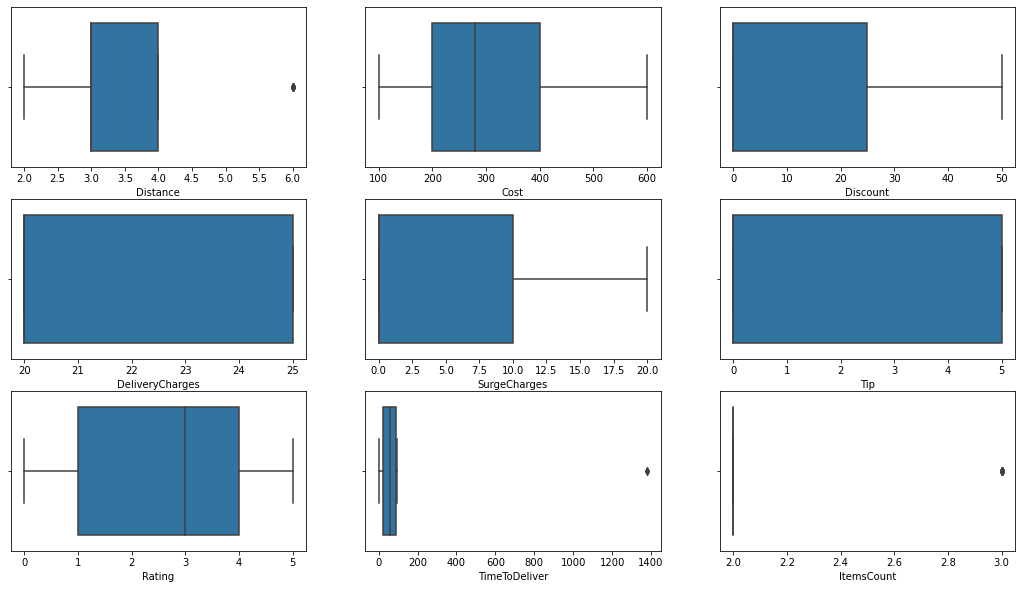

In [3097]:
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline
columns = ['Distance', 'Cost', 
                 'Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip', 'Rating',
                  'TimeToDeliver', 'ItemsCount']
fig,ax = plt.subplots(3,3,figsize=(18,10))
row = col = 0
for n,c in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(x=SwiggitoData[c], ax=ax[row,col])
    col += 1

### Observation from Box Plot

Distance and ItemsCount is showing Outliers, which in reality is not an outlier and is needed data and cannot be removed <br/>
TimeToDeliver - Has an outlier and needs a treatment
Rest of the attributes are looking good to proceed

### Outlier treatment
For the attribute TimeToDeliver I will be using the zscore Outlier removal approach with threshold 3


In [3098]:
from scipy import stats
zscore = np.abs(stats.zscore(SwiggitoData.TimeToDeliver))
# I am using Threashold as 3 to indetify outliers whose Z-Score is greater than 3, 
# the absolute function will mark all negatives to positive as well
threshold = 3
# How many data points are with Z-Score greater than Threshold 3.
print(np.where(zscore > 3))

(array([ 4, 33]),)


In [3099]:
SwiggitoData.loc[(zscore > 3)]

,Distance,Status,Cost,PromoCode,Discount,PaymentMode,DeliveryCharges,SurgeCharges,Tip,PureVeg,Membership,Rating,TimeToDeliver,ItemsCount
4,3.0,Cancelled,125.0,PRO,0.0,COD,20.0,0,0.0,Y,NO,1.0,1380.0,2
35,3.0,Delivered,500.0,NaN,25.0,WALLET,20.0,0,0.0,Y,BING,5.0,1380.0,2


It looks like the time taken to deliver is too high for the 2 rows 4,35. We will remove and proceed further.

In [3100]:
#Remove outliers with Z-score above 3
SwiggitoData = SwiggitoData[(zscore < 3)]
SwiggitoData.shape

(55, 14)

## Feature subset Selection
Before proceeding with Feature Subset selection, a Bivariate analysis will help us identify the corelation between feature and the target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the attributes to get a better sense of data.


### Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [3101]:
contColumns = ['Distance', 'Cost', 
                 'Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip',
                  'TimeToDeliver', 'ItemsCount']

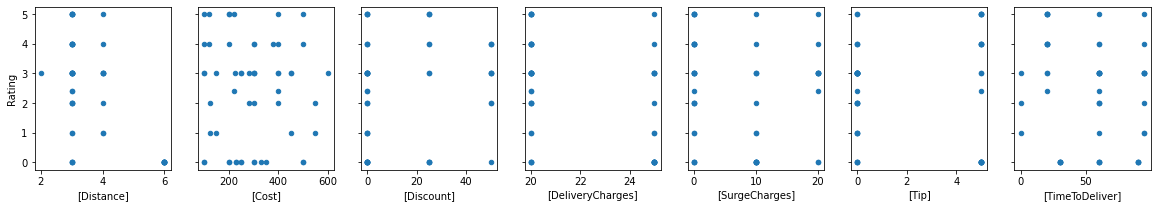

In [3102]:
fig, axes = plt.subplots(1,len(contColumns)-1, sharey=True)

for i, col in enumerate(contColumns[:-1]):
    SwiggitoData.plot(x=[col], y='Rating', figsize=(20,3), kind="scatter", ax=axes[i])

plt.show()

### Scatter charts interpretation
##### What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

    1.Increasing Trend: Good for ML

    2.Decreasing Trend: Good for ML

    3.No Trend: Not Good for ML

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
<b>Pearson's correlation coefficient</b> can simply be calculated as the covariance between two features  𝑥  and  𝑦  (numerator) divided by the product of their standard deviations (denominator):

    *Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
    *Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
    *Correlation near {0} means No relationship, the scatter plot will show no clear trend.
    *If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
    *We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [3103]:
# Continuous Data columns
contColumns = ['Rating','Distance', 'Cost', 
                 'Discount', 'DeliveryCharges', 'SurgeCharges', 'Tip',
                  'TimeToDeliver', 'ItemsCount']

# Creating the correlation matrix
CorrelationData=SwiggitoData[contColumns].corr()
CorrelationData

,Rating,Distance,Cost,Discount,DeliveryCharges,SurgeCharges,Tip,TimeToDeliver,ItemsCount
Rating,1.000000,-0.620657,-0.029486,0.152794,-0.430246,-0.129265,-0.027843,-0.190196,0.559869
Distance,-0.620657,1.000000,-0.001724,-0.080296,0.845029,0.383005,0.437007,0.241085,-0.341620
Cost,-0.029486,-0.001724,1.000000,-0.070496,0.133280,0.203365,-0.262707,0.339356,-0.220788
Discount,0.152794,-0.080296,-0.070496,1.000000,-0.061612,-0.339461,0.001717,-0.030114,0.091688
DeliveryCharges,-0.430246,0.845029,0.133280,-0.061612,1.000000,0.491304,0.125388,0.551569,-0.420560
SurgeCharges,-0.129265,0.383005,0.203365,-0.339461,0.491304,1.000000,-0.088983,0.295674,-0.381457
Tip,-0.027843,0.437007,-0.262707,0.001717,0.125388,-0.088983,1.000000,-0.500491,0.656233
TimeToDeliver,-0.190196,0.241085,0.339356,-0.030114,0.551569,0.295674,-0.500491,1.000000,-0.601772
ItemsCount,0.559869,-0.341620,-0.220788,0.091688,-0.420560,-0.381457,0.656233,-0.601772,1.000000


#### Displaying heat map to present the correlation matrix

<AxesSubplot:>

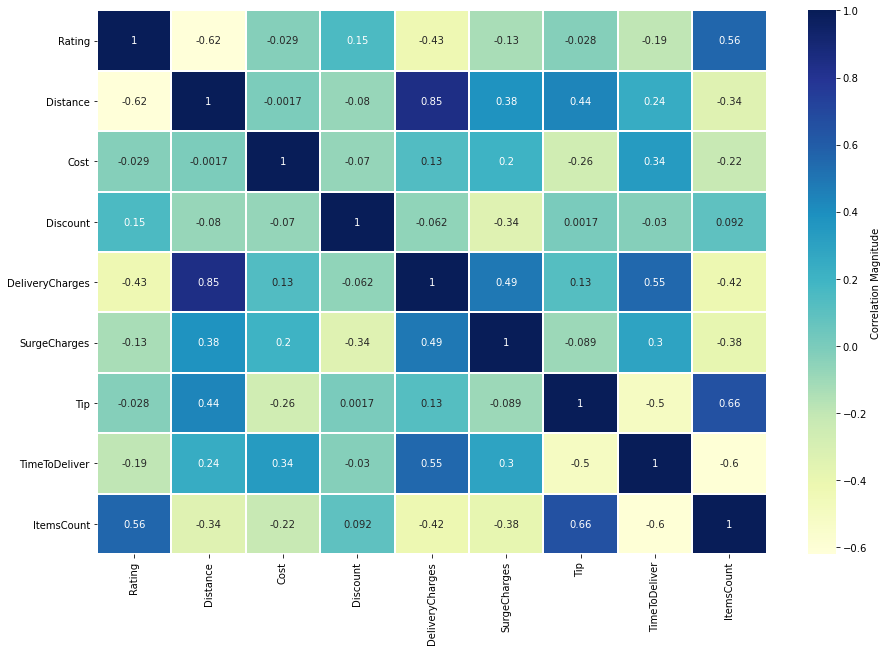

In [3104]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(SwiggitoData[contColumns].corr(), annot=True, linewidth=1, ax=ax, cmap="YlGnBu" , cbar_kws={'label': 'Correlation Magnitude'})

<b>Pearson's correlation coefficient</b> says If Correlation value between two variables is > 0.5 in magnitude, then the correlation is good to consider for ML. Now let's figure how many attributes make it's way with magnitude 0.5 and above

In [3105]:
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.5 ]

Rating        1.000000
Distance     -0.620657
ItemsCount    0.559869
Name: Rating, dtype: float64

Only 2 attributes Distance and ItemsCount are showing a good correlation with the target variable rating.
Let;s try to consider a magnitude 0.19 which includes TimeToDelover, which ideally should be an imporatant factor

In [3106]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.19 ]

Rating             1.000000
Distance          -0.620657
DeliveryCharges   -0.430246
TimeToDeliver     -0.190196
ItemsCount         0.559869
Name: Rating, dtype: float64

### Conclusion
##### Final selected Continuous columns:

Only <b>Distance</b>, <b>TimeToDeliver</b> and <b>ItemsCount</b> is significant

## Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

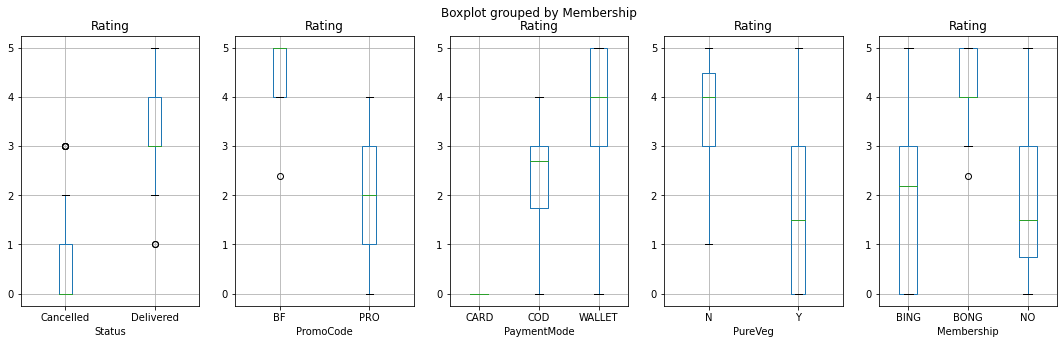

In [3107]:
# Box plots for Categorical Target Variable "Rating" and continuous attribute
CategoricalColsList=['Status', 'PromoCode', 'PaymentMode', 'PureVeg', 'Membership']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous attribute against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    SwiggitoData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all seven categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

    *Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
    *ANOVA Test result: Probability of H0 being true

In [3108]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, '\033[1m', 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1] , '\033[0m')
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [3109]:
# Calling the function to check which categorical variables are correlated with target
CategoricalColsList=['Status', 'PromoCode', 'PaymentMode', 'PureVeg', 'Membership']
FunctionAnova(inpData=SwiggitoData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalColsList)

##### ANOVA Results ##### 

Status  is correlated with Rating | P-Value: 1.1693139955349396e-10 
PromoCode  is correlated with Rating | P-Value: 4.88729747110079e-05 
PaymentMode  is correlated with Rating | P-Value: 2.519790662749266e-10 
PureVeg  is correlated with Rating | P-Value: 4.905308915322211e-06 
Membership  is correlated with Rating | P-Value: 5.636453767146474e-05 


['Status', 'PromoCode', 'PaymentMode', 'PureVeg', 'Membership']

In [3110]:
# Final Selected Columns
SelectedColumns=['Distance' , 'TimeToDeliver', 'ItemsCount',
                 'Status', 'PromoCode', 'PaymentMode', 'PureVeg', 'Membership']

# Selecting final columns and creating a new data frame
DataForML=SwiggitoData[SelectedColumns]
DataForML.head()

,Distance,TimeToDeliver,ItemsCount,Status,PromoCode,PaymentMode,PureVeg,Membership
0,3.0,60.0,2,Delivered,PRO,COD,Y,BING
1,3.0,20.0,3,Delivered,BF,WALLET,N,BONG
2,6.0,30.0,2,Cancelled,PRO,CARD,Y,BING
3,4.0,95.0,2,Delivered,PRO,COD,N,NO
5,3.0,0.0,2,Cancelled,PRO,COD,Y,NO


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

    1.Converting each Ordinal Categorical columns to numeric
    2.Converting Binary nominal Categorical columns to numeric using 1/0 mapping
    3.Converting all other nominal categorical columns to numeric using pd.get_dummies()
    4.Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
    
    
In this data there is no Ordinal categorical variable.

### Converting the binary nominal variable to numeric using 1/0 mapping

In [3111]:
DataForML.head()

,Distance,TimeToDeliver,ItemsCount,Status,PromoCode,PaymentMode,PureVeg,Membership
0,3.0,60.0,2,Delivered,PRO,COD,Y,BING
1,3.0,20.0,3,Delivered,BF,WALLET,N,BONG
2,6.0,30.0,2,Cancelled,PRO,CARD,Y,BING
3,4.0,95.0,2,Delivered,PRO,COD,N,NO
5,3.0,0.0,2,Cancelled,PRO,COD,Y,NO


In [3112]:
# Converting the binary nominal variable PureVeg to numeric
DataForML['PureVeg'].replace({'Y':1, 'N':0}, inplace=True)
# Converting Status attribute to numeric
DataForML['Status'].replace({'Delivered':1, 'Cancelled':0}, inplace=True)
DataForML.head()

,Distance,TimeToDeliver,ItemsCount,Status,PromoCode,PaymentMode,PureVeg,Membership
0,3.0,60.0,2,1,PRO,COD,1,BING
1,3.0,20.0,3,1,BF,WALLET,0,BONG
2,6.0,30.0,2,0,PRO,CARD,1,BING
3,4.0,95.0,2,1,PRO,COD,0,NO
5,3.0,0.0,2,0,PRO,COD,1,NO


### Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [3113]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=SwiggitoData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Distance,TimeToDeliver,ItemsCount,Status,PureVeg,PromoCode_BF,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,Rating
0,3.0,60.0,2,1,1,0,1,0,1,0,1,0,0,2.0
1,3.0,20.0,3,1,0,1,0,0,0,1,0,1,0,4.0
2,6.0,30.0,2,0,1,0,1,1,0,0,1,0,0,0.0
3,4.0,95.0,2,1,0,0,1,0,1,0,0,0,1,1.0
5,3.0,0.0,2,0,1,0,1,0,1,0,0,0,1,1.0


## Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [3114]:
DataForML_Numeric.columns

Index(['Distance', 'TimeToDeliver', 'ItemsCount', 'Status', 'PureVeg',
       'PromoCode_BF', 'PromoCode_PRO', 'PaymentMode_CARD', 'PaymentMode_COD',
       'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO', 'Rating'],
      dtype='object')

In [3115]:
# Separate Target Variable and Predictor Variables
Predictors=['Distance', 'TimeToDeliver', 'ItemsCount', 'Status', 'PureVeg',
       'PromoCode_BF', 'PromoCode_PRO', 'PaymentMode_CARD', 'PaymentMode_COD',
       'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO']
TargetVariable='Rating'

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Multiple Linear Regression - Data without Normalisation

In [3116]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data

print('R Squared model' , sklearn.metrics.r2_score(y_train, LREG.predict(X_train)))
print('R Square prediction', sklearn.metrics.r2_score(y_test, LREG.predict(X_test)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


print('Coeffocients : ', LREG.coef_)
print('Intercept : ', LREG.intercept_)

LinearRegression()
R Squared model 0.7572856369782357
R Square prediction 0.7750726519461407

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.0              2.0
1     5.0              4.0
2     4.0              4.0
3     0.0              2.0
4     0.0              0.0
Coeffocients :  [-0.64843206  0.00592334 -0.06578397  0.52160279 -1.21637631  0.48333333
  0.58536585 -0.51881533 -0.38222997  0.9010453   0.6689547  -0.06578397
 -0.60317073]
Intercept :  4.417317073170738


## Standardization/Normalization of data

In [3117]:
X_train =  x_scaler.fit_transform(X_train)
X_test = x_scaler.fit_transform(X_test)
Y_train =  y_scaler.fit_transform(y_train.reshape(-1, 1) )
Y_test = y_scaler.fit_transform(y_test.reshape(-1, 1) )

## Multiple Linear Regression - Data with Normalisation

In [3118]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R Squared model' , sklearn.metrics.r2_score(y_train, LREG.predict(X_train)))
print('R Square prediction', sklearn.metrics.r2_score(y_test, LREG.predict(X_test)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

print('Coeffocients : ', LREG.coef_)
print('Intercept : ', LREG.intercept_)

LinearRegression()
R Squared model 0.7572856369782357
R Square prediction 0.7315692331895093

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.0              2.0
1     5.0              4.0
2     4.0              4.0
3     0.0              2.0
4     0.0              1.0
Coeffocients :  [-0.67677645  0.16944286 -0.03687195  0.247456   -0.6048093   0.17624377
  0.29268293 -0.20641958 -0.23703243  0.390344    0.31255702 -0.03687195
 -0.29705875]
Intercept :  2.468421052631579


### Conclusion

RSquared error is same with or without Standardisation/Normalisation in case of Regression.